Saving train.csv to train.csv
Saving test.csv to test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.30864

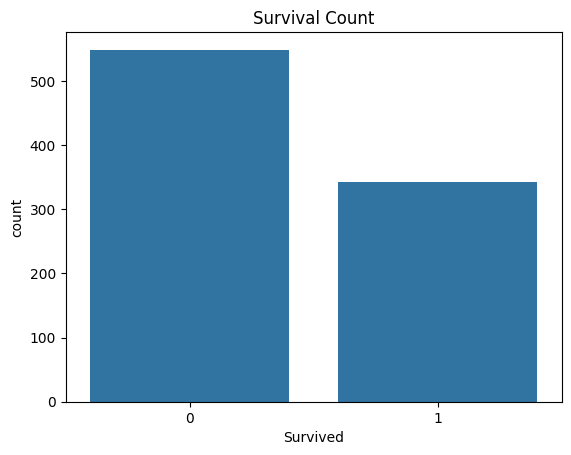

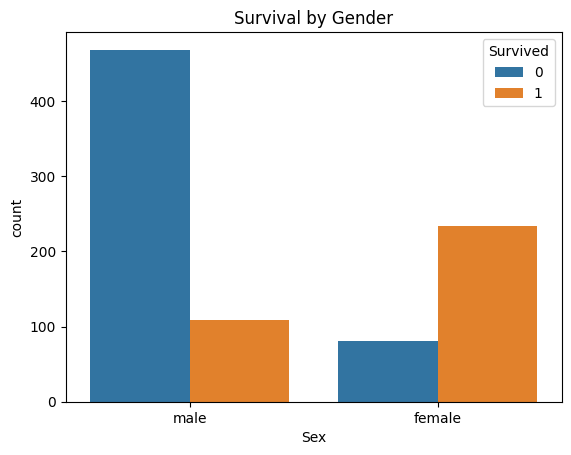

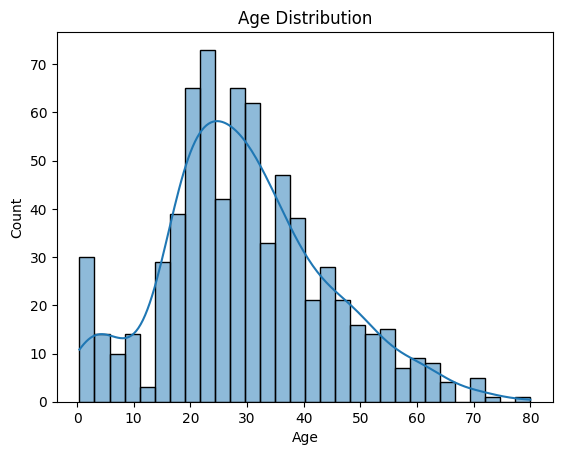

✅ Accuracy: 0.7988826815642458

📊 Confusion Matrix:
 [[89 16]
 [20 54]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# --------------------------------------------
# Import Libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# --------------------------------------------
# Upload and Load Dataset (Colab)
# --------------------------------------------
uploaded = files.upload()  # Upload train.csv and test.csv

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# --------------------------------------------
# Explore the Data
# --------------------------------------------
print(train_data.info())
print(train_data.describe())
print(train_data.isnull().sum())

# Visualization: Survival Count
sns.countplot(x='Survived', data=train_data)
plt.title("Survival Count")
plt.show()

# Visualization: Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title("Survival by Gender")
plt.show()

# Age Distribution
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# --------------------------------------------
# Data Cleaning & Preprocessing
# --------------------------------------------

# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Encode categorical variables
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns
train_data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
test_passenger_ids = test_data['PassengerId']
test_data.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# --------------------------------------------
# Split Data
# --------------------------------------------
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------
# Train Logistic Regression Model
# --------------------------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# --------------------------------------------
# Evaluate the Model
# --------------------------------------------
y_pred = model.predict(X_val)

print("✅ Accuracy:", accuracy_score(y_val, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_val, y_pred))

# --------------------------------------------
# Predict on Test Data
# --------------------------------------------
test_predictions = model.predict(test_data)

submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions
})

# Preview submission
submission.head()

# --------------------------------------------
# Save Predictions as CSV
# --------------------------------------------
submission.to_csv('titanic_predictions.csv', index=False)
files.download('titanic_predictions.csv')

